In [1]:
import os
import sys
import torch
import torchvision

sys.path.append('../')
import matplotlib.pyplot as plt
from evaluation import eval_utils as eu

In [4]:
with torch.no_grad():
    pil_list = eu.video_to_pil_list("../workdir/droid/iclight/Sun_Nov_19_14:42:02_2023_wrist_lmr_0.01_gmr_0.01_alpha_t_0.0/output_gt.mp4")
    edited_images = torch.concat([eu.load_image(pil, "cuda") for pil in pil_list], dim=0) / 255.0
    # edited_images = edited_images[:150, :, :, 221:]  # for teaser
    N, _, H, W = edited_images.shape

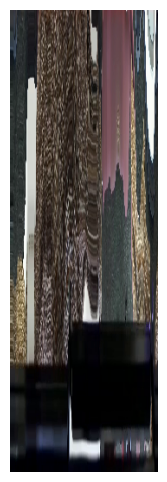

In [5]:
spaital_temporal_slices = edited_images.permute(3, 1, 2, 0)
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(6, 6))
plt.imshow(spaital_temporal_slices[W//2].cpu().numpy().transpose(1, 2, 0))
plt.axis("off")

torchvision.utils.save_image(spaital_temporal_slices[W//2], "output.png")